In [ ]:
# The dataset => https://drive.google.com/file/d/https://drive.google.com/file/d/1OENIFKelCgGdLVUbpSEX7uJA9mK35CQm/view?usp=sharing
!gdown --id 1OENIFKelCgGdLVUbpSEX7uJA9mK35CQm

Downloading...
From: https://drive.google.com/uc?id=1OENIFKelCgGdLVUbpSEX7uJA9mK35CQm
To: /content/Dataset 1.csv
100% 999k/999k [00:00<00:00, 57.9MB/s]


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras import layers
from keras import backend as K
from keras.utils.vis_utils import plot_model

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [ ]:
data = pd.read_csv('/content/Dataset 1.csv', engine = 'python')

data

,message,label
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...
10309,No Depression by G Herbo is my mood from now o...,1
10310,What do you do when depression succumbs the br...,1
10311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,dont mistake a bad day with depression! everyo...,1


In [ ]:
data = data.sample(frac = 1., random_state = 14).reset_index(drop = True)

print(data['label'].value_counts(0))
data

0    8000
1    2314
Name: label, dtype: int64


,message,label
0,"Just got done getting ready. ZOMG, ignorance i...",0
1,i let my depression slow down my work ethic so...,1
2,@Beautyinblknwht u mite need to check into reh...,0
3,I got a new brand Bible !! Thanks family,0
4,@LixMgx : as someone who has also been single/...,1
...,...,...
10309,@undagroundmilli That's pretty cool!,0
10310,@JoyAndLife Thank you so much for #ff and have...,0
10311,"you become a habbit, the more I consume the mo...",0
10312,@pg99 you get bored of that party yet?,0


In [ ]:
EPOCH = 10

split_val = int(0.2 * data.shape[0])

dataTest = data.iloc[-split_val :]
dataVal = data.iloc[- 2 * split_val : -split_val]
dataTrain = data.iloc[: - 2 * split_val]

In [ ]:
print(dataTrain['label'].value_counts())

dataTrain

0    4781
1    1409
Name: label, dtype: int64


,message,label
0,"Just got done getting ready. ZOMG, ignorance i...",0
1,i let my depression slow down my work ethic so...,1
2,@Beautyinblknwht u mite need to check into reh...,0
3,I got a new brand Bible !! Thanks family,0
4,@LixMgx : as someone who has also been single/...,1
...,...,...
6185,i've got &quot;how do you sleep&quot; stuck on...,0
6186,Happy mothers day tu all moms out there !!,0
6187,"So,"" I just saw somebody comment on a post abo...",1
6188,Happy late morning (my time) everyone!,0


In [ ]:
print(dataVal['label'].value_counts())

dataVal

0    1612
1     450
Name: label, dtype: int64


,message,label
6190,@carobuckman Have fun!!!,0
6191,I. Cannot. Stand. Depression. I. Just. Want. T...,1
6192,Another week of record sales at Fon. I love t...,0
6193,What's new in digital mkt?,0
6194,4 shows / speaking engagements in the next 3 d...,0
...,...,...
8247,@NettyP dang...where do u work? Do they have a...,0
8248,@mojoguzzi I was drinking cognac yesterday aft...,0
8249,if you follow me I follow you,0
8250,"SIP works in Flat, Volatile, Bullish , Bearis...",1


In [ ]:
print(dataTest['label'].value_counts())

dataTest

0    1607
1     455
Name: label, dtype: int64


,message,label
8252,hey tweets! ?,0
8253,Clever scientists! 3-D human 'mini-brains' she...,1
8254,It's a rainy NYC day.. wish I were home in my ...,0
8255,I just got hit with what literally feels a sol...,1
8256,i dont know if you guys know this but... i LO...,0
...,...,...
10309,@undagroundmilli That's pretty cool!,0
10310,@JoyAndLife Thank you so much for #ff and have...,0
10311,"you become a habbit, the more I consume the mo...",0
10312,@pg99 you get bored of that party yet?,0


In [ ]:
trainX = np.array(dataTrain.iloc[:, 0])
trainY = np.array(dataTrain.iloc[:, 1])

valX = np.array(dataVal.iloc[:, 0])
valY = np.array(dataVal.iloc[:, 1])

testX = np.array(dataTest.iloc[:, 0])
testY = np.array(dataTest.iloc[:, 1])

# # To check the outcome
# print(trainX)
# print(trainY)
# print(valX)
# print(valY)
# print(testX)
# print(testY)

# print(trainX.shape)
# print(trainY.shape)
# print(valX.shape)
# print(valY.shape)
# print(testX.shape)
# print(testY.shape)

In [ ]:
top_k = 50000
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words = top_k,
                                                  oov_token = "<unk>",
                                                  filters = '!"#$%&()*+.,-/:;=?@[\]^_`{|}~')
tokenizer.fit_on_texts(trainX)

tokenizer.word_index['<pad>'] = 0
tokenizer.index_word[0] = '<pad>'

train_seqs = tokenizer.texts_to_sequences(trainX)
val_seqs = tokenizer.texts_to_sequences(valX)
test_seqs = tokenizer.texts_to_sequences(testX)

train_seqs = tf.keras.preprocessing.sequence.pad_sequences(train_seqs, padding = 'pre')
val_seqs = tf.keras.preprocessing.sequence.pad_sequences(val_seqs, padding = 'pre')
test_seqs = tf.keras.preprocessing.sequence.pad_sequences(test_seqs, padding = 'pre')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         2069376   
_________________________________________________________________
bidirectional (Bidirectional (None, None, 512)         788480    
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 1024)        4198400   
_________________________________________________________________
bidirectional_2 (Bidirection (None, None, 128)         557568    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 16)                8768      
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 7,622,609
Trainable params: 7,622,609
Non-trainable params: 0
______________________________________________

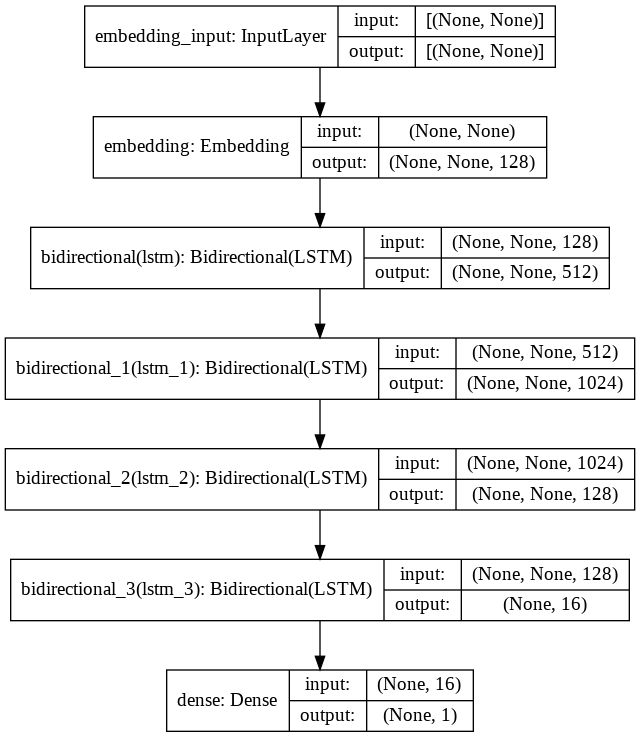

In [ ]:
model = Sequential()
model.add(layers.Embedding(len(tokenizer.word_index), 128))
model.add(layers.Bidirectional(layers.LSTM(256, return_sequences = True, dropout = 0.2)))
model.add(layers.Bidirectional(layers.LSTM(512, return_sequences = True, dropout = 0.2)))
model.add(layers.Bidirectional(layers.LSTM(64, return_sequences = True, dropout = 0.2)))
model.add(layers.Bidirectional(layers.LSTM(8, dropout = 0.2)))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.summary()
plot_model(model, to_file = 'model_plot.png', show_shapes = True, show_layer_names = True)

Epoch 1/10
194/194 [==============================] - 967s 5s/step - loss: 0.1971 - accuracy: 0.9365 - val_loss: 0.0259 - val_accuracy: 0.9961
Epoch 2/10
194/194 [==============================] - 972s 5s/step - loss: 0.0305 - accuracy: 0.9948 - val_loss: 0.0308 - val_accuracy: 0.9942
Epoch 3/10
194/194 [==============================] - 942s 5s/step - loss: 0.0213 - accuracy: 0.9963 - val_loss: 0.0282 - val_accuracy: 0.9956
Epoch 4/10
194/194 [==============================] - 957s 5s/step - loss: 0.0205 - accuracy: 0.9966 - val_loss: 0.0270 - val_accuracy: 0.9961
Epoch 5/10
194/194 [==============================] - 942s 5s/step - loss: 0.0114 - accuracy: 0.9985 - val_loss: 0.0276 - val_accuracy: 0.9956
Epoch 6/10
194/194 [==============================] - 964s 5s/step - loss: 0.0382 - accuracy: 0.9908 - val_loss: 0.0331 - val_accuracy: 0.9956
Epoch 7/10
194/194 [==============================] - 958s 5s/step - loss: 0.0209 - accuracy: 0.9950 - val_loss: 0.0234 - val_accuracy: 0.9966

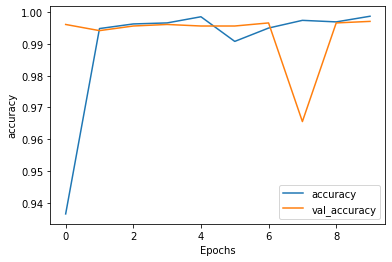

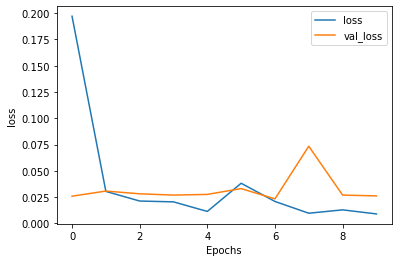


Epoch No.  Train Accuracy  Train Loss     Val Accuracy    Val Loss
       1   0.936511 	   0.197075 	   0.996120 	   0.025899
       2   0.994830 	   0.030480 	   0.994180 	   0.030801
       3   0.996284 	   0.021302 	   0.995635 	   0.028169
       4   0.996607 	   0.020515 	   0.996120 	   0.026951
       5   0.998546 	   0.011405 	   0.995635 	   0.027609
       6   0.990792 	   0.038206 	   0.995635 	   0.033123
       7   0.994992 	   0.020900 	   0.996605 	   0.023354
       8   0.997415 	   0.009698 	   0.965567 	   0.073421
       9   0.996931 	   0.012909 	   0.996605 	   0.026983
      10   0.998708 	   0.009048 	   0.997090 	   0.026180


In [ ]:
history = model.fit(train_seqs, trainY, epochs = EPOCH, validation_data = (val_seqs, valY), verbose = 1)

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

print('\nEpoch No.  Train Accuracy  Train Loss     Val Accuracy    Val Loss')
for i in range(EPOCH):
  print('{:8d} {:10f} \t {:10f} \t {:10f} \t {:10f}'.format(i + 1, history.history['accuracy'][i], history.history['loss'][i], history.history['val_accuracy'][i], history.history['val_loss'][i]))

194/194 [==============================] - 168s 853ms/step - loss: 0.0085 - accuracy: 0.9989
Train Loss: 0.008488488383591175
Train Accuracy: 0.9988691210746765 (Model Metric)
Train Accuracy: 0.9988691437802908 (sklearn Metric)
Train Precision: 1.0
Train Recall: 0.9950319375443577
Train F1-score: 0.9975097829953753


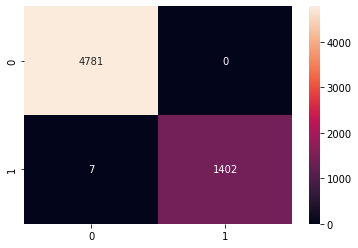

In [ ]:
y_pred = model.predict(train_seqs)

y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred = np.reshape(y_pred, (y_pred.shape[0]))

loss, accuracy = model.evaluate(train_seqs, trainY, verbose = 1)
print('Train Loss:', loss)
print('Train Accuracy:', accuracy, '(Model Metric)')
print('Train Accuracy:', accuracy_score(trainY, y_pred), '(sklearn Metric)')
print('Train Precision:', precision_score(trainY, y_pred))
print('Train Recall:', recall_score(trainY, y_pred))
print('Train F1-score:', f1_score(trainY, y_pred))

sns.heatmap(confusion_matrix(trainY, y_pred), annot = True, fmt = 'g')

65/65 [==============================] - 43s 657ms/step - loss: 0.0262 - accuracy: 0.9971
Validation Loss: 0.02618040144443512
Validation Accuracy: 0.997090220451355 (Model Metric)
Validation Accuracy: 0.997090203685742 (sklearn Metric)
Validation Precision: 1.0
Validation Recall: 0.9866666666666667
Validation F1-score: 0.9932885906040269


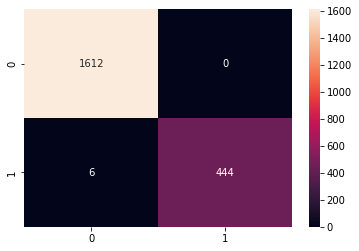

In [ ]:
y_pred = model.predict(val_seqs)

y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred = np.reshape(y_pred, (y_pred.shape[0]))

loss, accuracy = model.evaluate(val_seqs, valY, verbose = 1)
print('Validation Loss:', loss)
print('Validation Accuracy:', accuracy, '(Model Metric)')
print('Validation Accuracy:', accuracy_score(valY, y_pred), '(sklearn Metric)')
print('Validation Precision:', precision_score(valY, y_pred))
print('Validation Recall:', recall_score(valY, y_pred))
print('Validation F1-score:', f1_score(valY, y_pred))

sns.heatmap(confusion_matrix(valY, y_pred), annot = True, fmt = 'g')

65/65 [==============================] - 52s 764ms/step - loss: 0.0331 - accuracy: 0.9956
Test Loss: 0.03308849036693573
Test Accuracy: 0.9956353306770325 (Model Metric)
Test Accuracy: 0.995635305528613 (sklearn Metric)
Test Precision: 0.9977678571428571
Test Recall: 0.9824175824175824
Test F1-score: 0.9900332225913622


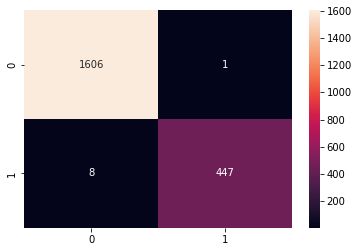

In [ ]:
y_pred = model.predict(test_seqs)

y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred = np.reshape(y_pred, (y_pred.shape[0]))

loss, accuracy = model.evaluate(test_seqs, testY, verbose = 1)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy, '(Model Metric)')
print('Test Accuracy:', accuracy_score(testY, y_pred), '(sklearn Metric)')
print('Test Precision:', precision_score(testY, y_pred))
print('Test Recall:', recall_score(testY, y_pred))
print('Test F1-score:', f1_score(testY, y_pred))

sns.heatmap(confusion_matrix(testY, y_pred), annot = True, fmt = 'g')